# 신경망 분류 모델

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = (16./3, 9./3)
def plot_model(sess, model, xy, labels, feature_lambda, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.2,1.2,400), np.linspace(-1.2,1.2,400))
    prediction = sess.run(model, feed_dict={x: np.array([feature_lambda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(5, 5))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.9)
    ax.clabel(cs, colors='gray')
    cs = ax.contour(xx, yy, Z, cmap='gray', levels=[0, 0.5, 1.0], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    predictions = sess.run(model, feed_dict={x: xy})
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

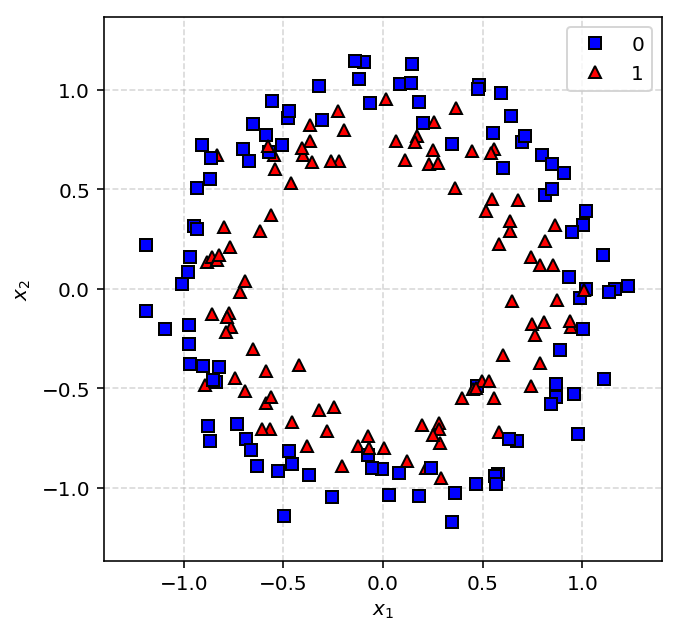

In [3]:
from sklearn.datasets import make_circles
from pandas import DataFrame

# 데이터 생성
xy, labels = make_circles(n_samples=200, noise=0.1, random_state=717)
labels = labels.reshape(-1,1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
plt.legend([0, 1])
plt.show()

In [4]:
# 특성값 정의
f1 = lambda x,y: [x, y]
f2 = lambda x,y: [x**2, y**2]

W=[-0.03984667 -0.04534506], b=0.01354103721678257


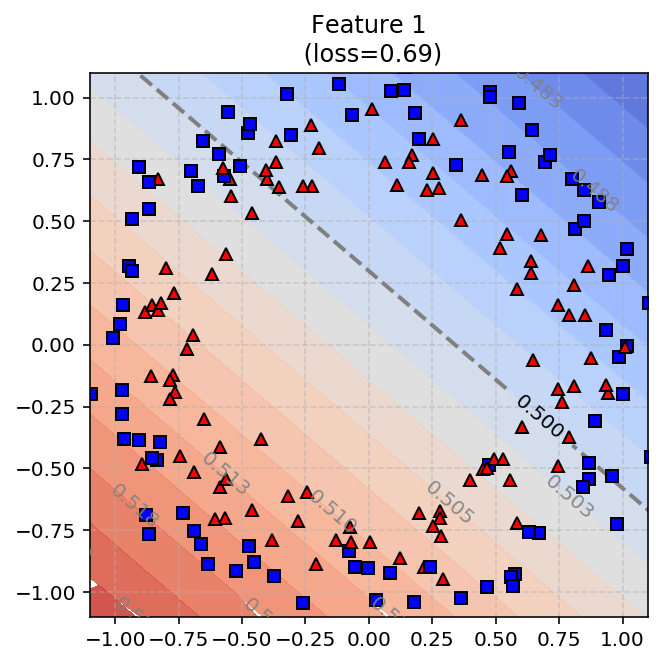

W=[-3.0084474 -3.2035053], b=2.558513879776001


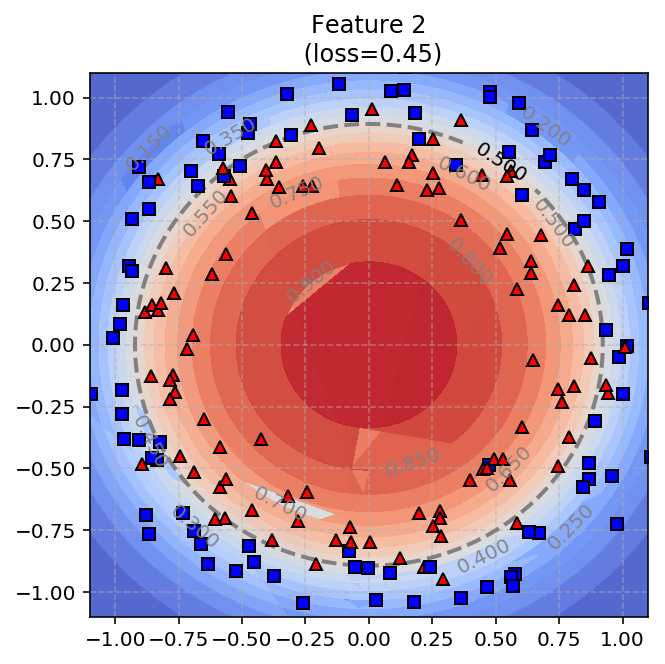

In [5]:
for i, f_fn in enumerate([f1, f2], 1):
    # 특성값 추출
    features = np.array([f_fn(xval, yval) for xval, yval in xy])
    dim_features = features.shape[1]
    
    # 예측모델
    x = tf.placeholder(tf.float32, shape=(None, dim_features))
    W = tf.Variable(tf.ones([dim_features,1]), tf.float32)
    b = tf.Variable(1.0, tf.float32)
    yhat = tf.sigmoid(tf.matmul(x, W) + b)
    
    # 손실함수
    y = tf.placeholder(tf.float32, shape=(None, 1))
    loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

    # 수치최적화 알고리즘
    MaxEpochs = 15
    lr = 0.1
    optimizer = tf.train.AdamOptimizer(lr)
    train = optimizer.minimize(loss)

    from helper import generate_batches
    # 데이터 섞기
    np.random.seed(7382)
    idx = np.arange(0, len(features))
    np.random.shuffle(idx)
    shuffled_features = features[idx]
    shuffled_labels = labels[idx]

    # 스토캐스틱 방법
    batch_size = 25
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    for epoch in range(MaxEpochs):
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
            sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
    
    loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
    W_sgd, b_sgd = sess.run([W, b])
    print('W={}, b={}'.format(W_sgd.flatten(), b_sgd))
    plot_model(sess, yhat, xy, labels, f_fn, 'Feature {}\n (loss={:1.2f})'.format(i, loss_val))